<a href="https://colab.research.google.com/github/Adityajeegari/GenAIB-40/blob/main/gen_pro_2114_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Data_Air_Pollutant.csv')
print(df.head())
df


          From Date           To Date  PM2.5    PM10    NO    NO2    NOx  \
0  01-01-2024 00:00  02-01-2024 00:00  65.10  107.53  2.37  19.85  12.48   
1  02-01-2024 00:00  03-01-2024 00:00  74.23  113.42  2.45  21.28  13.27   
2  03-01-2024 00:00  04-01-2024 00:00  81.83  123.53  2.59  22.27  13.92   
3  04-01-2024 00:00  05-01-2024 00:00  66.04  121.96  2.44  25.01  14.56   
4  05-01-2024 00:00  06-01-2024 00:00  58.38  106.22  2.12  25.46  14.51   

     NH3    SO2    CO  ...  Benzene  Toluene   Temp     RH    WS      WD  \
0  10.43   9.05  0.61  ...     0.61     2.19  26.42  67.65  0.43  187.48   
1  10.18   8.89  0.64  ...     0.60     2.20  26.41  71.19  0.52  172.35   
2   9.86  11.25  0.69  ...     0.61     2.19  26.66  70.97  0.76  173.54   
3  10.09  10.85  0.69  ...     0.61     2.21  26.41  71.06  0.73  172.96   
4   9.47  11.03  0.79  ...     0.64     2.33  26.11  66.52  1.08  192.12   

      SR      BP  Xylene     AT  
0  87.73  710.71    1.69  18.77  
1  82.34  710.31  

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Benzene,Toluene,Temp,RH,WS,WD,SR,BP,Xylene,AT
0,01-01-2024 00:00,02-01-2024 00:00,65.10,107.53,2.37,19.85,12.48,10.43,9.05,0.61,...,0.61,2.19,26.42,67.65,0.43,187.48,87.73,710.71,1.69,18.77
1,02-01-2024 00:00,03-01-2024 00:00,74.23,113.42,2.45,21.28,13.27,10.18,8.89,0.64,...,0.60,2.20,26.41,71.19,0.52,172.35,82.34,710.31,1.69,18.30
2,03-01-2024 00:00,04-01-2024 00:00,81.83,123.53,2.59,22.27,13.92,9.86,11.25,0.69,...,0.61,2.19,26.66,70.97,0.76,173.54,84.22,709.95,1.68,18.23
3,04-01-2024 00:00,05-01-2024 00:00,66.04,121.96,2.44,25.01,14.56,10.09,10.85,0.69,...,0.61,2.21,26.41,71.06,0.73,172.96,81.26,709.91,1.69,19.21
4,05-01-2024 00:00,06-01-2024 00:00,58.38,106.22,2.12,25.46,14.51,9.47,11.03,0.79,...,0.64,2.33,26.11,66.52,1.08,192.12,79.74,709.80,1.78,22.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,15-03-2025 00:00,16-03-2025 00:00,30.62,112.89,14.12,30.21,22.96,19.29,6.03,0.72,...,0.81,2.93,29.03,47.23,1.03,274.81,108.25,712.88,2.25,35.31
439,16-03-2025 00:00,17-03-2025 00:00,28.25,95.54,13.85,29.64,22.02,18.92,5.88,1.01,...,0.80,2.90,29.19,41.73,1.20,296.65,105.14,712.80,2.23,35.44
440,17-03-2025 00:00,18-03-2025 00:00,21.31,91.82,14.00,29.94,22.51,19.11,5.93,3.18,...,0.81,2.95,28.72,39.75,1.02,305.13,110.59,712.54,2.26,35.22
441,18-03-2025 00:00,19-03-2025 00:00,34.51,110.69,13.27,28.40,21.57,18.12,5.67,0.77,...,0.82,2.97,29.43,51.17,0.63,258.93,110.24,712.49,2.28,35.00


In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
From Date    0
To Date      0
PM2.5        0
PM10         0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
CO           0
Ozone        0
Benzene      0
Toluene      0
Temp         0
RH           0
WS           0
WD           0
SR           0
BP           0
Xylene       0
AT           0
dtype: int64


In [ ]:
target_column = 'SR'
feature_columns = [col for col in df.columns if col != target_column]
X = df[feature_columns].values
y = df[target_column].values

In [ ]:
import pandas as pd

# Assuming your file is a CSV file based on the file_path variable
file_path = '/content/Data_Air_Pollutant.csv'

# Use pd.read_csv to read a CSV file
df = pd.read_csv(file_path)

df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')
df['To Date'] = pd.to_datetime(df['To Date'], errors='coerce')

df = df.dropna(subset=['SR'])

df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

feature_columns = [col for col in df.columns if col not in ['SR', 'From Date', 'To Date']]
X = df[feature_columns].values
y = df['SR'].values

In [ ]:
df = df.dropna(subset=['SR'])

In [ ]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [ ]:
df = df.select_dtypes(include=[np.number])

In [ ]:
target_column = 'SR'
feature_columns = [col for col in df.columns if col != target_column]

In [ ]:
X = df[feature_columns].values
y = df[target_column].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# ... (your previous code to load and preprocess data) ...


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use AdaBoostRegressor
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)
ab_predictions = ab_model.predict(X_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler # Import StandardScaler for scaling

# ... (Your previous code) ...

# Before model fitting, scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)      # Scale test data using the same scaler

# ... (Continue with your model fitting code) ...
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 8565.5791 - val_loss: 9442.9395
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8116.1763 - val_loss: 9226.8936
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7899.4053 - val_loss: 8954.2354
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7685.8701 - val_loss: 8595.2900
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7261.6821 - val_loss: 8127.4277
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6829.8213 - val_loss: 7527.9683
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6285.8643 - val_loss: 6806.5825
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5391.8789 - val_loss: 5978.3066
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4508.9058 - val_loss: 5089.9980
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3639.7961 - val_loss: 4172.0952
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2927.7480 - val_loss: 3315.8289
Epoch 12

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the number of epochs
epochs = 100  # You can change this to your desired number of epochs

bnn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

bnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = bnn_model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=0)
ann_predictions = bnn_model.predict(X_test).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
def bayesian_dense(units, prior_std=1.0):
    return tfp.layers.DenseVariational(
        units=units,
        make_prior_fn=lambda: tfd.Normal(loc=0., scale=prior_std),
        make_posterior_fn=lambda: tfp.layers.DefaultMeanFieldNormalFn(),
        kl_weight=1 / 1000.0
    )


In [ ]:
def regression_metrics(y_true, y_pred, model_name='Model'):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'\n{model_name} Performance:')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}')
    return mae, rmse, r2

In [ ]:
ab_mae, ab_rmse, ab_r2 = regression_metrics(y_test, ab_predictions, "Adaptive Boosting")
ann_mae, ann_rmse, ann_r2 = regression_metrics(y_test, ann_predictions, "ANN")


Adaptive Boosting Performance:
MAE: 15.74
RMSE: 20.82
R²: 0.19

ANN Performance:
MAE: 12.09
RMSE: 18.36
R²: 0.37


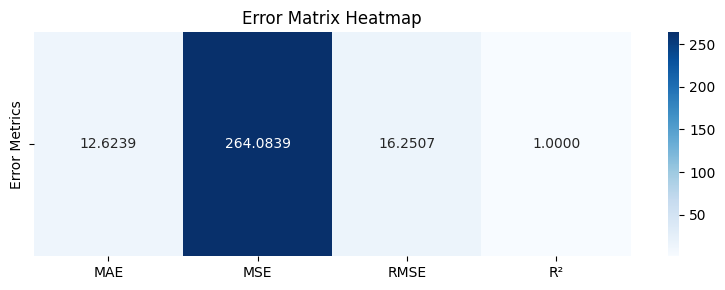

In [ ]:
actual_col = 'SR'
predicted_col = 'AdaBoost_Predictions'
filtered_df = df.dropna(subset=[actual_col])
filtered_df = filtered_df.select_dtypes(include=[np.number])
filtered_df = filtered_df.iloc[:len(ab_predictions)]
filtered_df[predicted_col] = ab_predictions
y_true = filtered_df[actual_col]
y_pred = filtered_df[predicted_col]
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_true)
error_data = {
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R²': [r2]
}
error_df = pd.DataFrame(error_data, index=['Error Metrics'])
plt.figure(figsize=(8, 3))
sns.heatmap(error_df, annot=True, cmap='Blues', fmt=".4f")
plt.title("Error Matrix Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
def classify_radiation(values):
    return np.digitize(values, bins=[200, 500])

In [ ]:
actual_class = classify_radiation(y_test)
predicted_class = classify_radiation(ab_predictions)

In [ ]:
print("\nConfusion Matrix (AdaBoost):")
print(confusion_matrix(actual_class, predicted_class))
print("Accuracy:", accuracy_score(actual_class, predicted_class))
print("Precision:", precision_score(actual_class, predicted_class, average='weighted'))


Confusion Matrix (AdaBoost):
[[88]]
Accuracy: 1.0
Precision: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


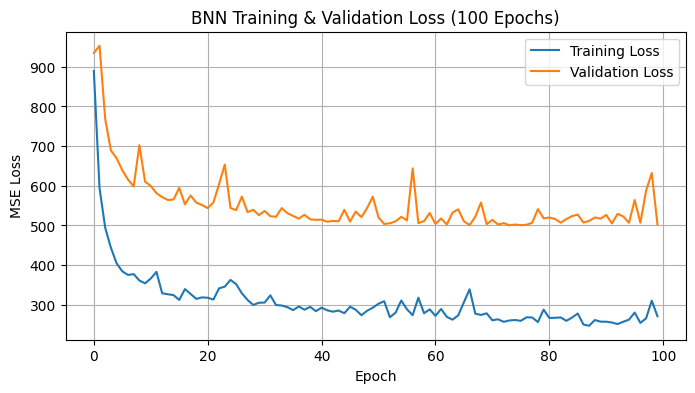

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f"BNN Training & Validation Loss ({epochs} Epochs)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Ideal line
    plt.grid(True)
    plt.show()


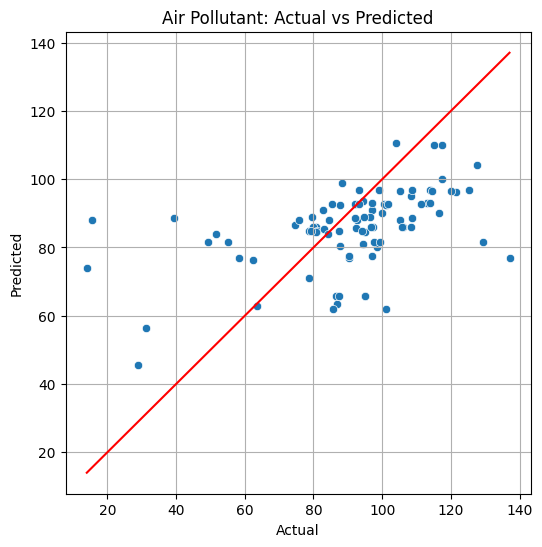

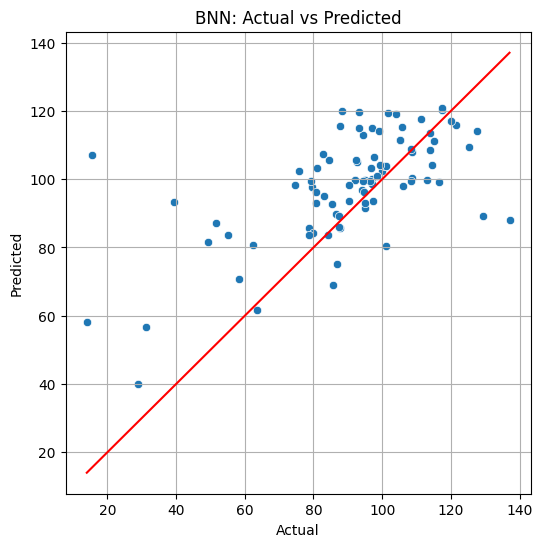

In [ ]:
plot_actual_vs_predicted(y_test, ab_predictions, "Air Pollutant: Actual vs Predicted")
plot_actual_vs_predicted(y_test, bnn_predictions, "BNN: Actual vs Predicted")


In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Air Pollutant_Predicted': ab_predictions,
    'BNN_Predicted': bnn_predictions
})
print("\nSample of Actual vs Predicted:")
print(comparison_df.head(10))



Sample of Actual vs Predicted:
   Actual  Air Pollutant_Predicted  BNN_Predicted
0   85.43                92.866970      92.738220
1   84.43                87.957273     105.780037
2   94.48                93.752978     112.894882
3  113.06                93.167883      99.711128
4   82.86                91.087419     107.497986
5   80.72                86.058866      93.157494
6   86.90                63.565000      75.103279
7  108.61                88.783043     107.943748
8  108.25                95.055349     108.905701
9   97.03                91.087419      99.984360


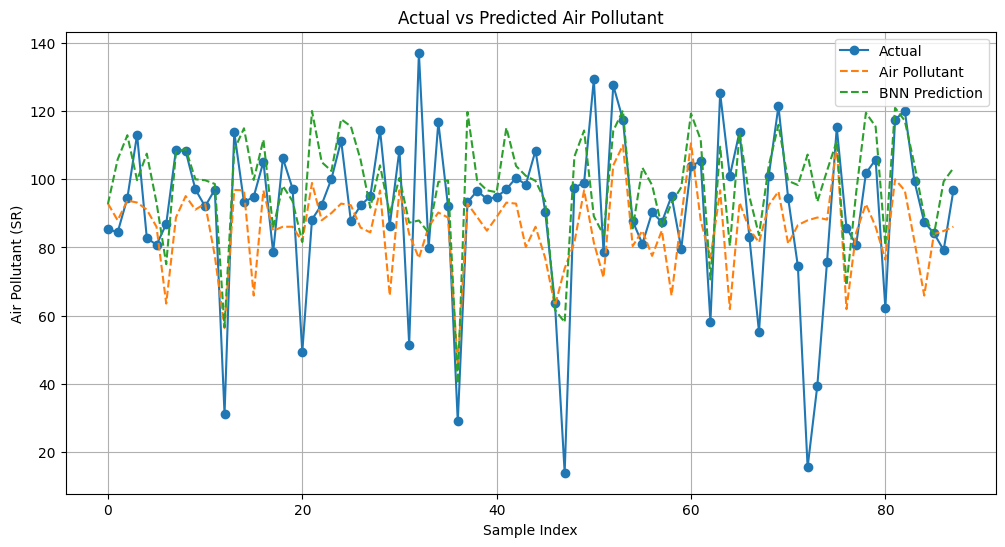

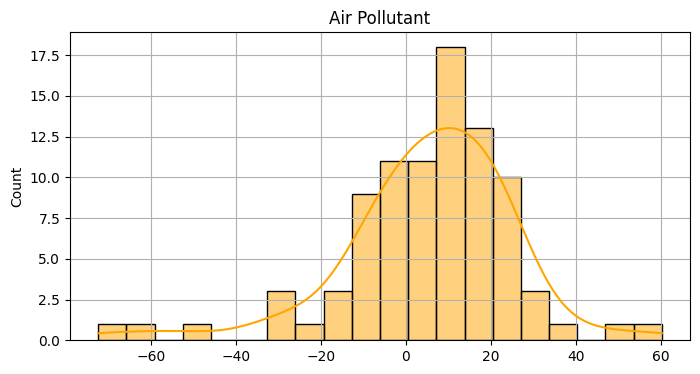

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", marker='o')
plt.plot(ab_predictions, label="Air Pollutant", linestyle='--')
plt.plot(bnn_predictions, label="BNN Prediction", linestyle='--')
plt.title("Actual vs Predicted Air Pollutant")
plt.xlabel("Sample Index")
plt.ylabel("Air Pollutant (SR)")
plt.legend()
plt.grid(True)
plt.show()

residuals_ada = y_test - ab_predictions
plt.figure(figsize=(8, 4))
sns.histplot(residuals_ada, kde=True, bins=20, color='orange')
plt.title("Air Pollutant")
plt.grid(True)
plt.show()

In [ ]:
error_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted (Air Pollutant)": ab_predictions,
    "Predicted (BNN)": ann_predictions[:len(y_test)],
    "Error (Air pollutant )": abs(y_test - ab_predictions),
    "Error (BNN)": abs(y_test - ann_predictions[:len(y_test)])
})
print("\n Error Table (First 10 rows):")
print(error_df.head(10))


 Error Table (First 10 rows):
   Actual  Predicted (Air Pollutant)  Predicted (BNN)  Error (Air pollutant )  \
0   85.43                  92.866970        89.652534                7.436970   
1   84.43                  87.957273        96.971367                3.527273   
2   94.48                  93.752978       106.727333                0.727022   
3  113.06                  93.167883        94.998772               19.892117   
4   82.86                  91.087419       102.025047                8.227419   
5   80.72                  86.058866        83.296837                5.338866   
6   86.90                  63.565000        71.071991               23.335000   
7  108.61                  88.783043        99.752502               19.826957   
8  108.25                  95.055349       101.496155               13.194651   
9   97.03                  91.087419        95.579918                5.942581   

   Error (BNN)  
0     4.222534  
1    12.541367  
2    12.247333  
3    18.0

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_estimators_range = [50, 100, 150, 200]
for n_estimators in n_estimators_range:
    # Changed 'bayesian_dense' to 'bayesian_dense_model' to avoid conflict
    bayesian_dense_model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=1.0, random_state=42)
    bayesian_dense_model.fit(X_train_scaled, y_train)  # Use the model for fitting
    y_pred_air = bayesian_dense_model.predict(X_test_scaled)
    mse_ada = mean_squared_error(y_test, y_pred_air)
    r2_ada = r2_score(y_test, y_pred_air)

    print(f"bayesian with {n_estimators} estimators - MSE: {mse_ada:.2f}, R-squared: {r2_ada:.2f}")

bayesian with 50 estimators - MSE: 393.68, R-squared: 0.26
bayesian with 100 estimators - MSE: 391.77, R-squared: 0.27
bayesian with 150 estimators - MSE: 405.90, R-squared: 0.24
bayesian with 200 estimators - MSE: 416.18, R-squared: 0.22
